In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
dfx = pd.read_csv('Diabetes_XTrain.csv')
dfy = pd.read_csv('Diabetes_YTrain.csv')

In [7]:
dfx.head(n=5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,168,88,42,321,38.2,0.787,40
1,8,110,76,0,0,27.8,0.237,58
2,7,147,76,0,0,39.4,0.257,43
3,2,100,66,20,90,32.9,0.867,28
4,4,129,86,20,270,35.1,0.231,23


In [8]:
dfy.head(n=5)

,Outcome
0,1
1,0
2,1
3,1
4,0


In [9]:
x = dfx.values
y = dfy.values
print(x.shape)
print(y.shape)

(576, 8)
(576, 1)


In [10]:
y = y.reshape((-1,))

In [11]:
print(y.shape)

(576,)


In [15]:
#KNN Algorithm

In [16]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X,Y, querypoint, k=50):
    
    vals = []
    m = X.shape[0]
    
    for i in range(m):
        d = dist(querypoint, X[i])
        vals.append((d,Y[i]))
        
    vals = sorted(vals)
    #Nearest/First K points
    
    vals = vals[:k]
    
    vals = np.array(vals)
    
    #print(vals)
    
    new_vals = np.unique(vals[:,1], return_counts = True)
    
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    return int(pred)

In [17]:
def get_acc(y_pred,y):
    return float((y_pred==y).sum())/y.shape[0]

In [18]:
dfx_test = pd.read_csv('Diabetes_XTest.csv')
x_test = dfx_test.values
print(x_test.shape)

(192, 8)


In [19]:
y_t = []
for x_t in x:
    y_t.append(knn(x,y,x_t))

In [20]:
print(get_acc(y_t, y))

0.7413194444444444


In [21]:
#saving the y_test into csv files

In [22]:
df = pd.DataFrame(data = y_t)
df.to_csv("Ytest.csv")

In [23]:
df.head(n=10)

,0
0,0
1,0
2,1
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [30]:
accuracy = []
for k in range(1,50):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x,y)
    pred = knn.predict(x)
    accuracy.append(metrics.accuracy_score(y,pred))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

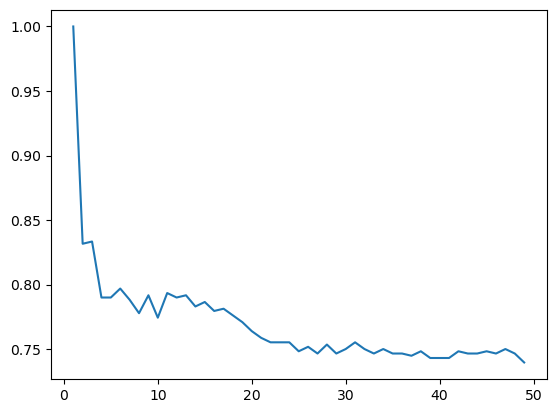

In [32]:
indices = np.arange(1,50)
plt.plot(indices, accuracy)

In [33]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x,y)
pred = knn.predict(x_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [34]:
df = pd.DataFrame(data=pred)
df.to_csv("ytest.csv")
df.head(n=10)

,0
0,1
1,0
2,0
3,0
4,0
5,0
6,1
7,0
8,0
9,0
